Rozmiar zbioru treningowego: 60000
Rozmiar zbioru testowego: 10000
Liczba klas:  10
Rozmiar obrazków: (28, 28)


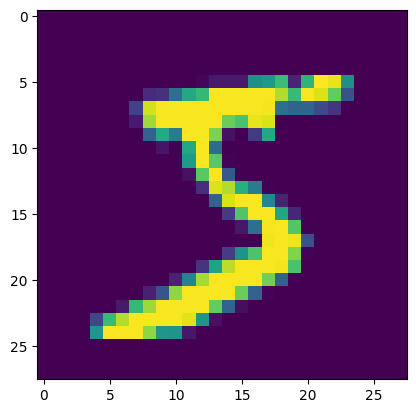

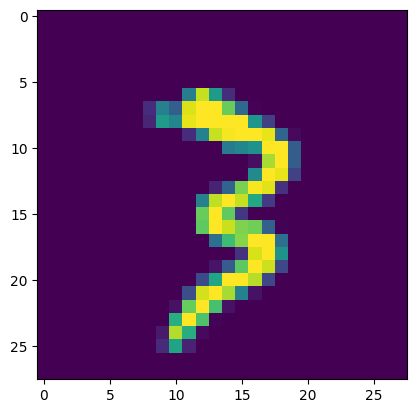

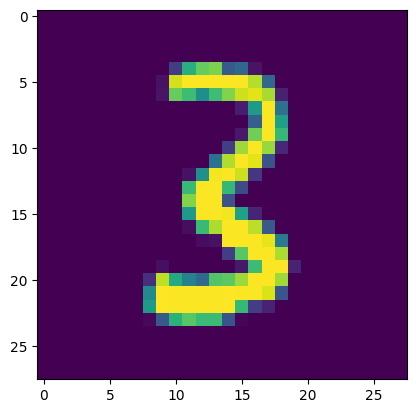

In [ ]:
from tensorflow import keras

from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("Rozmiar zbioru treningowego:", len(train_images))
print("Rozmiar zbioru testowego:", len(test_images))
print("Liczba klas: ", len(set(train_labels)))
print("Rozmiar obrazków:", train_images[0].shape)

import matplotlib.pyplot as plt

plt.imshow(train_images[0])
plt.show()
plt.imshow(train_images[25000])
plt.show()
plt.imshow(train_images[50000])
plt.show()


In [ ]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
import numpy as np

train_images_reshaped = train_images.reshape(len(train_images), train_images[0].shape[0] * train_images[0].shape[1]).astype(np.float32) / 255
test_images_reshaped = test_images.reshape(len(test_images), test_images[0].shape[0] * test_images[0].shape[1]).astype(np.float32) / 255
print(train_images_reshaped.shape)
print(test_images_reshaped.shape)



(60000, 784)
(10000, 784)


In [ ]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

network.fit(train_images_reshaped, train_labels, batch_size=128, epochs=5)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8717 - loss: 0.4404
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9655 - loss: 0.1162
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9777 - loss: 0.0748
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9847 - loss: 0.0520
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9888 - loss: 0.0379


In [ ]:
test_loss, test_acc = network.evaluate(test_images_reshaped, test_labels)

print('test_acc:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9759 - loss: 0.0759
test_acc: 0.9794999957084656
